In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


for att in ['axes.labelsize', 'axes.titlesize', 'legend.fontsize',
            'legend.fontsize', 'xtick.labelsize', 'ytick.labelsize']:
    plt.rcParams[att] = 14

from altaipony.ffd import FFD
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

import time
tstamp = time.strftime("%d_%m_%Y_%H_%M", time.localtime())

paperdir="/home/ekaterina/Documents/002_writing/flares-in-clusters-ii-draft/Flares_in_Clusters_with_K2_2/"

def beta(alpha, E, f):
    """Derive beta from cumulative distribution."""
    return f * E**(alpha -1) * (alpha -1)

## Howard et al. (2019)

> Although these rates are high, they are constructed from
active stars of each spectral type and do not hold for inactive
stars. Loyd et al. (2018) finds inactive stars to be 10×less
active in the far-UV (FUV)-130 bandpass.

In [2]:
howard = pd.read_csv("howard2019_alphabeta.tsv",delimiter="\t")
howard.alpha = howard.alpha + 1.
howard=howard[howard.SpT!="K7"]
howard.loc[howard.SpT=="K5","SpT"] = "K5-K7"

howard["c"] = ["darkgreen","limegreen", "aquamarine","lightseagreen","teal","darkslategrey"]
howard["beta"] = (howard.alpha -1.)*365.25*np.power(10,howard.beta_cum)
howard

,index,SpT,alpha,beta_cum,Emin,Emax,c,beta
0,1,K5-K7,2.34,44.55,34.50,35.55,darkgreen,1.736581e+47
2,3,M0,1.96,31.05,34.20,35.70,limegreen,3.934246e+33
3,4,M1,1.88,28.50,33.80,35.75,aquamarine,1.016419e+31
4,5,M2,1.84,26.82,33.45,35.40,lightseagreen,2.027074e+29
5,6,M3,2.25,40.02,33.10,34.40,teal,4.780796e+42
6,7,M4,1.97,30.45,32.80,33.75,darkslategrey,9.985319e+32


## Lin et al. (2019)

> The stars had to be within 100 pc (M dwarfs) and 200 pc (K dwarfs) from the Earth

> The power-law indices of M and K dwarfs are $\gamma=1.82\pm0.02, \gamma=1.86\pm.02$, respectively, and these
are quite close to each other. Shibayama et al. (2013) showed
that the power-law index of G-type stars is $\gamma=2.2$ by binning
the data set while our result is $\gamma=2.01\pm0.03$. The flare
occurrence rate of M dwarfs is about once in 0.6 yr for
$E> 10^{33}$ erg and once in $6.5$ yr and $350$ yr for
superflares with $E$ of $10^{34}$ erg and $10^{35}$ erg, respectively.
In comparison, the K dwarfs’ flare occurrence rate is about
once in $4.7$ yr with $E> 10^{34}$ erg, namely, more
frequent than the M dwarfs’. The G dwarfs’ flare occurrence
rate of the flares with $E>10^{35}$ erg is also higher than
the M dwarfs’, it is about once in $320$ yr.

In [3]:
# Lin+2019
# Fig. 19
Galpha, Kalpha, Malpha = 2.01, 1.86, 1.82

Gbeta = beta(Galpha, 1e35, 1/320)
Kbeta = beta(Kalpha, 1e34, 1/4.7)
Mbeta = beta(Malpha, 1e33, 1/.6)
lin = [#(Galpha, Gbeta, "G", "peru"),
       (Kalpha, Kbeta, "K", "k", 1e34, 4e35),
       (Malpha, Mbeta, "M", "maroon", 7e33, 1e35)]

# Hilton 2011

Following the criteria of West et al. (2008), stars with Hα equivalent width of more than 1Å in emission are considered active.



# This and my old paper

In [4]:
df = pd.read_csv("tables/cluster_SpT_alphabeta.csv")
dffull = pd.read_csv("tables/full_sample_alphabeta.csv").set_index("Unnamed: 0")
alpha_en = float(dffull.loc["alpha_en","0"])
beta_en = float(dffull.loc["beta_en","0"])

# make M67 visible
df.loc[df.cluster == "M67","EKp_min"] = df.loc[df.cluster == "M67","EKp_min"].values[0] * .8
df.loc[df.cluster == "M67","EKp_max"] = df.loc[df.cluster == "M67","EKp_max"].values[0] * 1.2
df

,Teff,cluster,alpha,alpha_up_err,alpha_low_err,beta,beta_up_err,beta_low_err,nflares,nfit,...,ispowerlaw_en,istruncated_en,davenport_alpha,davenport_beta,EKp_min,EKp_max,Tmin,Tmax,Tmid,Tmid_err
0,2500-3000,Pleiades,2.099049,0.034490,0.034246,2803.076429,1290.542588,916.024399,23,12,...,True,False,2.132493,2.812204e+38,1.447218e+32,2.077848e+33,2500,3000,2750,250
1,2500-3000,Hyades,2.097361,0.034515,0.034687,8102.433642,4201.762761,2853.763669,26,9,...,True,False,2.182089,7.794302e+39,1.112223e+32,2.824276e+33,2500,3000,2750,250
2,2500-3000,Praesepe,2.098660,0.034714,0.034469,2427.250998,1588.056240,1043.366890,9,4,...,True,False,2.184624,9.236214e+39,2.301577e+32,1.527768e+33,2500,3000,2750,250
3,3000-3250,Pleiades,2.088774,0.030587,0.030879,4842.452927,1262.598911,1011.876207,616,258,...,False,False,2.059023,1.204943e+36,2.321865e+32,2.107852e+34,3000,3250,3125,125
4,3000-3250,Hyades,2.080838,0.033632,0.033327,2618.465668,709.176391,570.972925,137,76,...,True,False,2.108619,3.349341e+37,1.309516e+32,8.359334e+33,3000,3250,3125,125
5,3000-3250,Praesepe,2.075759,0.031247,0.030672,2739.648978,743.338419,578.738097,601,275,...,True,False,2.111154,3.969518e+37,3.983082e+32,3.596507e+34,3000,3250,3125,125
6,3250-3500,Pleiades,2.076244,0.030739,0.029936,3487.663489,771.035581,631.337316,590,310,...,True,True,1.924723,5.579213e+31,2.945599e+32,1.607150e+34,3250,3500,3375,125
7,3250-3500,Hyades,2.092642,0.033783,0.033223,2130.660617,542.075416,426.248848,174,83,...,True,False,1.974319,1.560911e+33,2.044841e+32,9.687724e+33,3250,3500,3375,125
8,3250-3500,Praesepe,2.016983,0.026891,0.026223,1153.285428,211.464745,173.590096,970,612,...,False,True,1.976854,1.850517e+33,2.279472e+32,1.422746e+34,3250,3500,3375,125
9,3250-3500,Rup 147,2.098576,0.034873,0.034685,326.884739,193.076063,132.132295,4,4,...,True,False,2.015227,2.431519e+34,9.010936e+31,3.795542e+32,3250,3500,3375,125


In [5]:
ilin = pd.read_csv("old_beta_ilin.csv")
ilin = ilin[ilin['T_max (K)'] != 7000]
ilin

,Unnamed: 0,cluster,T_min (K),T_max (K),number of light curves in bin,number of flares in bin,alpha,alpha_err,log10 beta,log10 beta_err,log10 beta2,log10 beta2_high_err,log10 beta2_low_err,min_en_erg,max_en_erg_estimate
1,1,M44,3000,3249,206,22,2.047590,0.027088,34.507341,0.909730,32.912272,0.288394,1.315928,1.131709e+33,34.25
2,2,M44,3250,3499,164,55,2.131035,0.054078,37.506428,1.795637,33.144622,0.198772,0.377161,5.715820e+32,34.25
3,3,M44,3500,3749,152,88,2.021523,0.030490,34.008827,1.008250,33.287401,0.126739,0.179718,3.611787e+32,34.50
4,4,M44,3750,4000,47,13,2.012838,0.079076,33.399954,2.614073,32.970605,0.201903,0.388983,3.995716e+32,33.75
6,6,M45,3000,3249,224,94,2.051605,0.019852,34.899746,0.655397,33.187810,0.146666,0.223114,4.781664e+32,34.75
7,7,M45,3250,3499,195,262,2.137402,0.027988,38.374125,0.929000,33.790751,0.085285,0.106228,5.870064e+32,34.30
8,8,M45,3500,3749,130,179,2.369090,0.036633,46.133631,1.218530,33.840220,0.101138,0.132075,7.601244e+32,34.30
9,9,M45,3750,4000,47,53,2.149913,0.066052,39.070992,2.204914,34.040511,0.127482,0.181198,9.872670e+32,34.30


# Shibayama+2013

In [6]:
# Shiabayama 2013

# all
# Superflare defined as >1e33 erg (page 7 in paper)
alpha_shibayama = 2.2
beta_shibayama = 2.3e-3 * (alpha_shibayama - 1.) * np.power(1e33, alpha_shibayama - 1)

# most active: average frequency of superflares on the 9 most active G-type dwarfs, 
# whose superflare occurrence rate is more than once in 10 days.
alpha_shibayama_active = alpha_shibayama
beta_shibayama_active = 36.525 * (alpha_shibayama - 1.) * np.power(1e33, alpha_shibayama - 1)

# Raetz+2020

In [7]:
# Raetz et al. (2020)
#  Fig. 22
alpha_raetz = 1.85
beta_raetz_fastrot = beta(alpha_raetz, 1e33, np.power(10,-.7)*365.25 )
beta_raetz_slowrot = beta(alpha_raetz, 1e33, np.power(10,-1.2)*365.25 )

## Guenther et al. (2020) 

> We find no significant difference between stars with and
without detected rotation modulation. This is somewhat
surprising given that fast rotating M dwarfs are suggested to
flare more frequently. Moreover, we find that the average flare
energy per star depends on the effective temperature and radius.

In [8]:
# Wu+2015
# Did not explicitly calc. beta 
wualpha = 2.04
wubeta = 8*np.power(10,36.44) # from Fig. 7a

In [9]:
# Lurie+2015
alphaA, alphaB = 1.99, 2.03
betaA, betaB = beta(alphaA, 1e31, 0.8*365.25), beta(alphaB, 1e31, 0.35*365.25)

# Chang+2015

In [10]:
# MMT 6.5 m telescope (see Hartman et al. 2008)
# Table 5
chang = pd.DataFrame({"rmin": [17,18,19,20,21],
                      "rmax": [18,19,20,21,22],
                      "clower":[14.39, 26.61, 27.71, 29.44,  17.57],
                      "cupper":[15.3, 27.60, 28.65, 30.2, 18.36],
                      "alpha":[1.52, 1.89, 1.93, 1.97, 1.62],
                      "Emin":[32.9,32.9,32.9,32.9,32.9,],
                      "Emax":[35.23,34.39,34.18,34.31,34.48]})

In [11]:
chang["beta"] = np.power(10,chang.clower) * (chang.alpha - 1.) * 365.25 * 24.
chang

,rmin,rmax,clower,cupper,alpha,Emin,Emax,beta
0,17,18,14.39,15.30,1.52,32.9,35.23,1.118935e+18
1,18,19,26.61,27.60,1.89,32.9,34.39,3.178275e+30
2,19,20,27.71,28.65,1.93,32.9,34.18,4.181041e+31
3,20,21,29.44,30.20,1.97,32.9,34.31,2.341926e+33
4,21,22,17.57,18.36,1.62,32.9,34.48,2.019264e+21


# Plot the FFDs

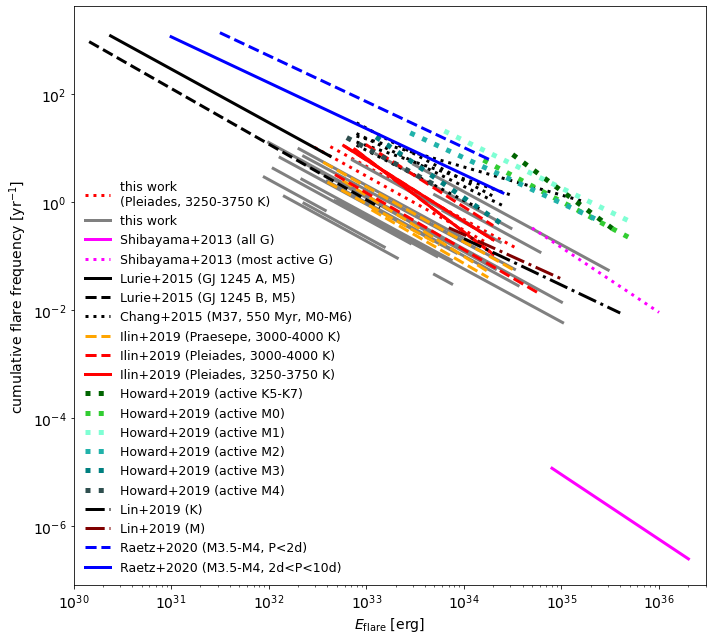

In [15]:
fig, ax = plt.subplots(1,figsize=(10,9))
ed = np.linspace(1e32,1e35,3)


# This work
l = [f"this work\n(Pleiades, 3250-3750 K)", None]
for label, row in df.iterrows():
    ffd = FFD(alpha=row.alpha_en, beta=row.beta_en)
    ffd.ed = np.linspace(row.EKp_min, row.EKp_max,3)
   
    if ((row.Teff in["3250-3500","3500-3750"]) & (row.cluster=="Pleiades")):
        ffd.plot_powerlaw(ax, c="red",linestyle="dotted", linewidth=3, 
                          label=l.pop())
    else:
        ffd.plot_powerlaw(ax, linewidth=3, c="grey", )#label=df.cluster)
    
    
ffd = FFD(alpha=alpha_en, beta=beta_en)
ffd.ed = ed
ffd.plot_powerlaw(ax, c="grey", linewidth=3, label="this work")


# Shibayama 2013

ffd = FFD(alpha=alpha_shibayama, beta=beta_shibayama)
ffd.ed = np.linspace(8e34,2e36,3)
ffd.plot_powerlaw(ax, c="magenta",linewidth=3, 
                  label="Shibayama+2013 (all G)") # Fig. 5b

ffd = FFD(alpha=alpha_shibayama_active, beta=beta_shibayama_active)
ffd.ed = np.linspace(5e34,1e36,3)
ffd.plot_powerlaw(ax, c="magenta",linewidth=3, linestyle="dotted", 
                  label="Shibayama+2013 (most active G)") # Fig. 8

# Lurie+2015

ffd = FFD(alpha=alphaA, beta=betaA)
ffd.ed = np.linspace(np.power(10,30.38),np.power(10,32.63),3) #Table 1
ffd.plot_powerlaw(ax, c="k",linewidth=3, 
                  label="Lurie+2015 (GJ 1245 A, M5)")

ffd = FFD(alpha=alphaB, beta=betaB)
ffd.ed = np.linspace(np.power(10,30.16), np.power(10,33.14), 3)  #Table 1
ffd.plot_powerlaw(ax, c="k",linewidth=3, linestyle="dashed", 
                  label="Lurie+2015 (GJ 1245 B, M5)")

# Chang+2015

for label, row in chang.iterrows():
    ffd = FFD(alpha=row.alpha, beta=row.beta)
    ffd.ed = np.linspace(np.power(10,row.Emin), np.power(10,row.Emax), 3) # Table 5
    if row.rmin == 20.:
        ffd.plot_powerlaw(ax, c="k", linestyle="dotted",
                      label=f"Chang+2015 (M37, 550 Myr, M0-M6)", linewidth=3)
    else:
        ffd.plot_powerlaw(ax, c="k", linestyle="dotted", linewidth=3)
        
# Ilin+2019
    
for label, row in ilin.iterrows():
    ffd = FFD(alpha=row.alpha, beta=np.power(10,row["log10 beta"]),)
    ffd.ed = np.linspace(row.min_en_erg, np.power(10,row.max_en_erg_estimate),3)
    if row["cluster"] == "M44":
        c, clus ="orange", "Praesepe"
    elif row["cluster"] == "M45":
        c, clus ="r", "Pleiades"
        
    if row['T_min (K)'] == 3250.:
        ffd.plot_powerlaw(ax, c=c,linewidth=3,linestyle="dashed",
                  label=f"Ilin+2019 ({clus}, 3000-4000 K)")
    elif row['T_min (K)'] != 3250.:
        ffd.plot_powerlaw(ax, c=c,linewidth=3,linestyle="dashed",
                 )
ilin2 = ilin[(ilin.cluster=="M45") & (ilin['T_min (K)'].isin([3250.,3500.]))]
for label, row in ilin2.iterrows():
    ffd = FFD(alpha=row["alpha"], beta=np.power(10,row["log10 beta"]),)
    ffd.ed = np.linspace(row.min_en_erg, np.power(10,row.max_en_erg_estimate),3)
    c="r"
    if row['T_min (K)'] == 3250:
        ffd.plot_powerlaw(ax, c=c,linewidth=3,
                  label=f"Ilin+2019 ({clus}, 3250-3750 K)")
    else:
        ffd.plot_powerlaw(ax, c=c,linewidth=3,)

# Howard+2019
    
for label, row in howard.iterrows():
    ffd = FFD(alpha=row.alpha, beta=row.beta) 
    ffd.ed = np.linspace(np.power(10,float(row.Emin)), np.power(10,float(row.Emax)),3)
    ffd.plot_powerlaw(ax, c=row.c, label=f"Howard+2019 (active {row.SpT})",
                      linestyle=":", linewidth=5)
    

# Lin+2019

for alpha, beta, label, c, emin, emax in lin:
    ffd = FFD(alpha=alpha, beta=beta)
    ffd.ed = np.linspace(emin, emax, 3)
    ffd.plot_powerlaw(ax, c=c, linestyle="dashdot",
                      label=f"Lin+2019 ({label})", linewidth=3)
   
# Raetz+2020

ffd = FFD(alpha=alpha_raetz, beta=beta_raetz_fastrot)
ffd.ed = np.linspace(np.power(10,31.5), np.power(10,34.3),3)
ffd.plot_powerlaw(ax, c="blue",linewidth=3, 
                  linestyle="dashed", label="Raetz+2020 (M3.5-M4, P<2d)")

ffd = FFD(alpha=alpha_raetz, beta=beta_raetz_slowrot)
ffd.ed = np.linspace(np.power(10,31.0), np.power(10,34.4),3)
ffd.plot_powerlaw(ax, c="blue",linewidth=3, 
                  label="Raetz+2020 (M3.5-M4, 2d<P<10d)")




#--------------------------------------------------------
    
plt.yscale("log")
plt.xscale("log")
#plt.ylim(2e-7,2e3)
plt.xlim(1e30,3e36)
plt.ylabel(r"cumulative flare frequency [yr$^{-1}$]")
plt.xlabel(r"$E_\mathrm{flare}$ [erg]")
plt.legend(loc=3, fontsize=12.5, frameon=False)#loc=(1.1,0))
plt.tight_layout()
plt.savefig(f"plots/{tstamp}_discussion_FFDs.png", dpi=300)
plt.savefig(f"{paperdir}pics/FFDs/discussion_FFDs.png", dpi=300);